In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Pendulum

The EOM of a pendulum:

$$
\ddot{\theta} = -\omega^2\sin(\theta)
$$

where $\omega^2 = g/l$, $g = 9.8 m/s^2$, and $l = 1m$

## Task 1: Solving the pendulum

In the task, I'll use Euler method, Staggered algorithm, and Velocity Verlet algorithm to solve the EOM of a pendulum.

### 1.) Euler method

$$
\theta(t+dt)=\theta(t)+\dot{\theta}(t)dt
$$

$$
\dot{\theta}(t+dt)=\dot{\theta}(t)+\ddot{\theta}(t)dt
$$

In [5]:

def M1(theta_i,dtheta_i,ddtheta_i,dt):
    theta_f = theta_i + dtheta_i*dt
    dtheta_f = dtheta_i + ddtheta_i*dt
    return theta_f,dtheta_f

def F(theta,w):
    ddtheta = -w**2 * np.sin(theta)
    return ddtheta


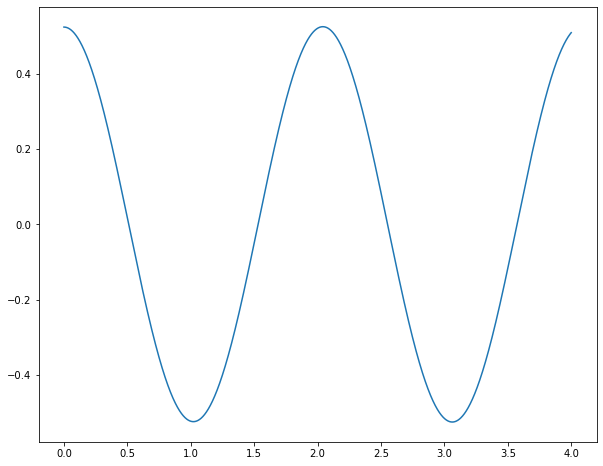

In [6]:
"""
Physical quantities
"""

g = 9.80655
l = 1
w = np.sqrt(g/l)
t = np.linspace(0,4,20000)
dt = t[1] - t[0]
dtheta = 0
theta = [np.pi/6]

'''
Simulation
'''

for i in range(len(t) - 1):
    a,dtheta = M1(theta[i],dtheta,F(theta[i],w),dt)
    theta.append(a)

'''
Figure
'''

fig, ax = plt.subplots(figsize = (10,8));
ax.plot(t, theta);

### 2.) Staggered algorithm

$$
\dot{\theta}(t+dt)=\dot{\theta}(t)+\ddot{\theta}(t)dt
$$

$$
\theta(t+dt)=\theta(t)+\dot{\theta}(t+dt)dt
$$

In [7]:

def M2(theta_i,dtheta_i,ddtheta_i,dt):
    dtheta_f = dtheta_i + ddtheta_i*dt
    theta_f = theta_i + dtheta_f*dt
    return theta_f,dtheta_f

def F(theta,w):
    ddtheta=-w**2*np.sin(theta)
    return ddtheta


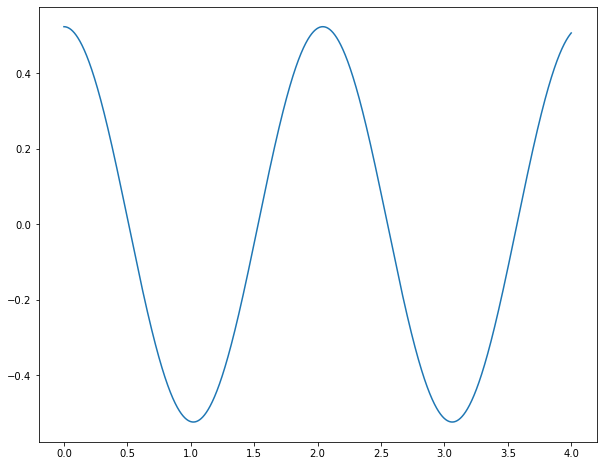

In [8]:
"""
Physical quantities
"""

g = 9.80655
l = 1
w = np.sqrt(g/l)
t = np.linspace(0,4,20000)
dt = t[1] - t[0]
dtheta = 0
theta = [np.pi/6]

'''
Simulation
'''

for i in range(len(t) - 1):
    a,dtheta = M2(theta[i],dtheta,F(theta[i],w),dt)
    theta.append(a)

'''
Figure
'''

fig, ax = plt.subplots(figsize = (10,8));
ax.plot(t, theta);

### 3.) Velocity Verlet algorithm

$$
\dot{\theta}(t+dt/2)=\dot{\theta}(t)+\ddot{\theta}(t)dt/2
$$

$$
\theta(t+dt)=\theta(t)+\dot{\theta}(t+dt/2)dt
$$

$$
\dot{\theta}(t+dt)=\dot{\theta}(t+dt/2)+\ddot{\theta}(t+dt)dt/2
$$

In [9]:

def M3(theta_i,dtheta_i,ddtheta_i,w,dt):
    dtheta_half = dtheta_i + ddtheta_i*dt/2
    theta_f = theta_i + dtheta_half*dt
    ddtheta_f = F(theta_f,w)
    dtheta_f = dtheta_half+ddtheta_f*dt/2
    return theta_f,dtheta_f

def F(theta,w):
    ddtheta=-w**2*np.sin(theta)
    return ddtheta


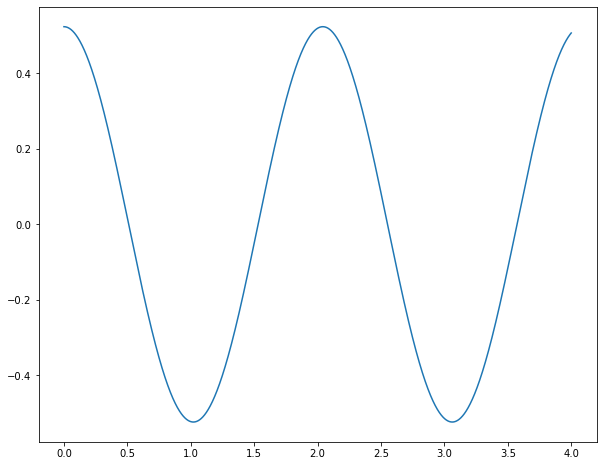

In [10]:
"""
Physical quantities
"""

g = 9.80655
l = 1
w = np.sqrt(g/l)
t = np.linspace(0,4,20000)
dt = t[1] - t[0]
dtheta = 0
theta = [np.pi/6]

'''
Simulation
'''

for i in range(len(t) - 1):
    a,dtheta = M3(theta[i],dtheta,F(theta[i],w),w,dt)
    theta.append(a)

'''
Figure
'''

fig, ax = plt.subplots(figsize = (10,8));
ax.plot(t, theta);


## Task 2: Fidelity and Accuracy

In the task, I'll assume $\theta(0) = 2\pi/3$ and $\dot{\theta(0)} = 0$

* For each of the method, I'll plot the pendulum trajectory $\theta(t)$ for time step $\delta=0.1$, $0.01$, and $0.001$. And also I'll zoom in on the curve at $t=1$ and visually compare the values from the three time stpes. 

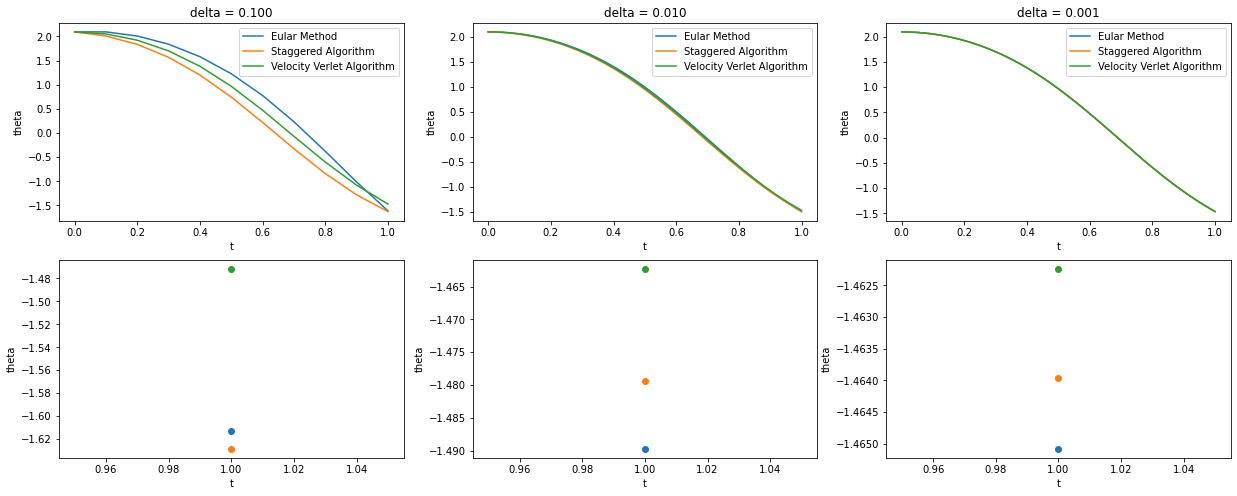

In [11]:
"""
Physical quantities
"""

g = 9.80655
l = 1
w = np.sqrt(g/l)
t = []
t.append(np.linspace(0,1,11))
t.append(np.linspace(0,1,101))
t.append(np.linspace(0,1,1001))
theta_M1 = [[2*np.pi/3],[2*np.pi/3],[2*np.pi/3]]
theta_M2 = [[2*np.pi/3],[2*np.pi/3],[2*np.pi/3]]
theta_M3 = [[2*np.pi/3],[2*np.pi/3],[2*np.pi/3]]

'''
Simulation
'''
for j in range(len(t)):
    dtheta = [0,0,0]
    for i in range(len(t[j]) - 1):
        theta_M1_f,dtheta[0] = M1(theta_M1[j][i],dtheta[0],F(theta_M1[j][i],w),t[j][1]-t[j][0])
        theta_M1[j].append(theta_M1_f)
        theta_M2_f,dtheta[1] = M2(theta_M2[j][i],dtheta[1],F(theta_M2[j][i],w),t[j][1]-t[j][0])
        theta_M2[j].append(theta_M2_f)
        theta_M3_f,dtheta[2] = M3(theta_M3[j][i],dtheta[2],F(theta_M3[j][i],w),w,t[j][1]-t[j][0])
        theta_M3[j].append(theta_M3_f)

'''
Figure
'''

fig, ax = plt.subplots(nrows = 2, ncols = len(t), figsize = (21,8));
for i in range(len(ax[0])):
    ax[0,i].plot(t[i],theta_M1[i]);
    ax[0,i].plot(t[i],theta_M2[i]);
    ax[0,i].plot(t[i],theta_M3[i]);
    ax[0,i].legend(['Eular Method','Staggered Algorithm','Velocity Verlet Algorithm']);
    ax[0,i].set_xlabel("t");
    ax[0,i].set_ylabel("theta");
    ax[0,i].set_title("delta = %.3f" %10**(-i-1));
    ax[1,i].plot(t[i][-1],theta_M1[i][-1],"o-");
    ax[1,i].plot(t[i][-1],theta_M2[i][-1],"o-");
    ax[1,i].plot(t[i][-1],theta_M3[i][-1],"o-");
    ax[1,i].set_xlabel("t");
    ax[1,i].set_ylabel("theta");


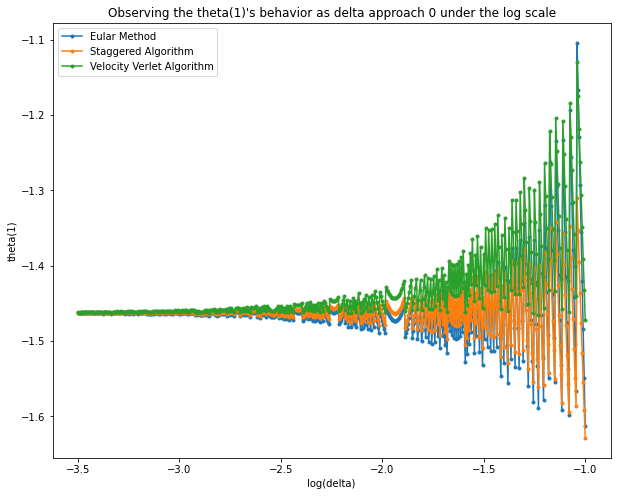

In [19]:
"""
Physical quantities
"""

g = 9.80655
l = 1
w = np.sqrt(g/l)
delta = np.logspace(-1,-3.5,500)
theta_M1 = []
theta_M2 = []
theta_M3 = []
for i in range(len(delta)):
    theta_M1.append([2*np.pi/3])
    theta_M2.append([2*np.pi/3])
    theta_M3.append([2*np.pi/3])

'''
Simulation
'''


for i in range(len(delta)):
    dtheta = [0,0,0]
    for j in range(int(1/delta[i])):
        theta_M1[i],dtheta[0] = M1(theta_M1[i],dtheta[0],F(theta_M1[i],w),delta[i])
        theta_M2[i],dtheta[1] = M2(theta_M2[i],dtheta[1],F(theta_M2[i],w),delta[i])
        theta_M3[i],dtheta[2] = M3(theta_M3[i],dtheta[2],F(theta_M3[i],w),w,delta[i])

'''
Figure
'''

fig, ax = plt.subplots(figsize = (10,8));
ax.plot(np.log10(delta),theta_M1,".-")
ax.plot(np.log10(delta),theta_M2,".-")
ax.plot(np.log10(delta),theta_M3,".-")
ax.legend(['Eular Method','Staggered Algorithm','Velocity Verlet Algorithm'])
ax.set_xlabel("log(delta)");
ax.set_ylabel("theta(1)");
ax.set_title("Observing the theta(1)'s behavior as delta approach 0 under the log scale");

As we could see, the theta(1)'s value converges when we choose smaller delta. It also reveals the trajectory converges as delta goes zero.

## Task 3: Stability

I assume $\theta(0)=0.001$, $\dot{\theta}(0)=0$, and $T=10$. 

* For each of the method, I plot the pendulum trajectory $\theta(t)$ for time stpes $\delta=0.1, 0.2, ...., 0.8$. 
* At about what $\delta_c$ does it go unstable?
* How does $\delta_c$ compare with the characteristic time period of the pendulum?
* At $\delta_c/2$, how accurate is the amplitude of the oscillation? (You will need to observe several periods in order to estimate the maximum amplitude ofthe solution)

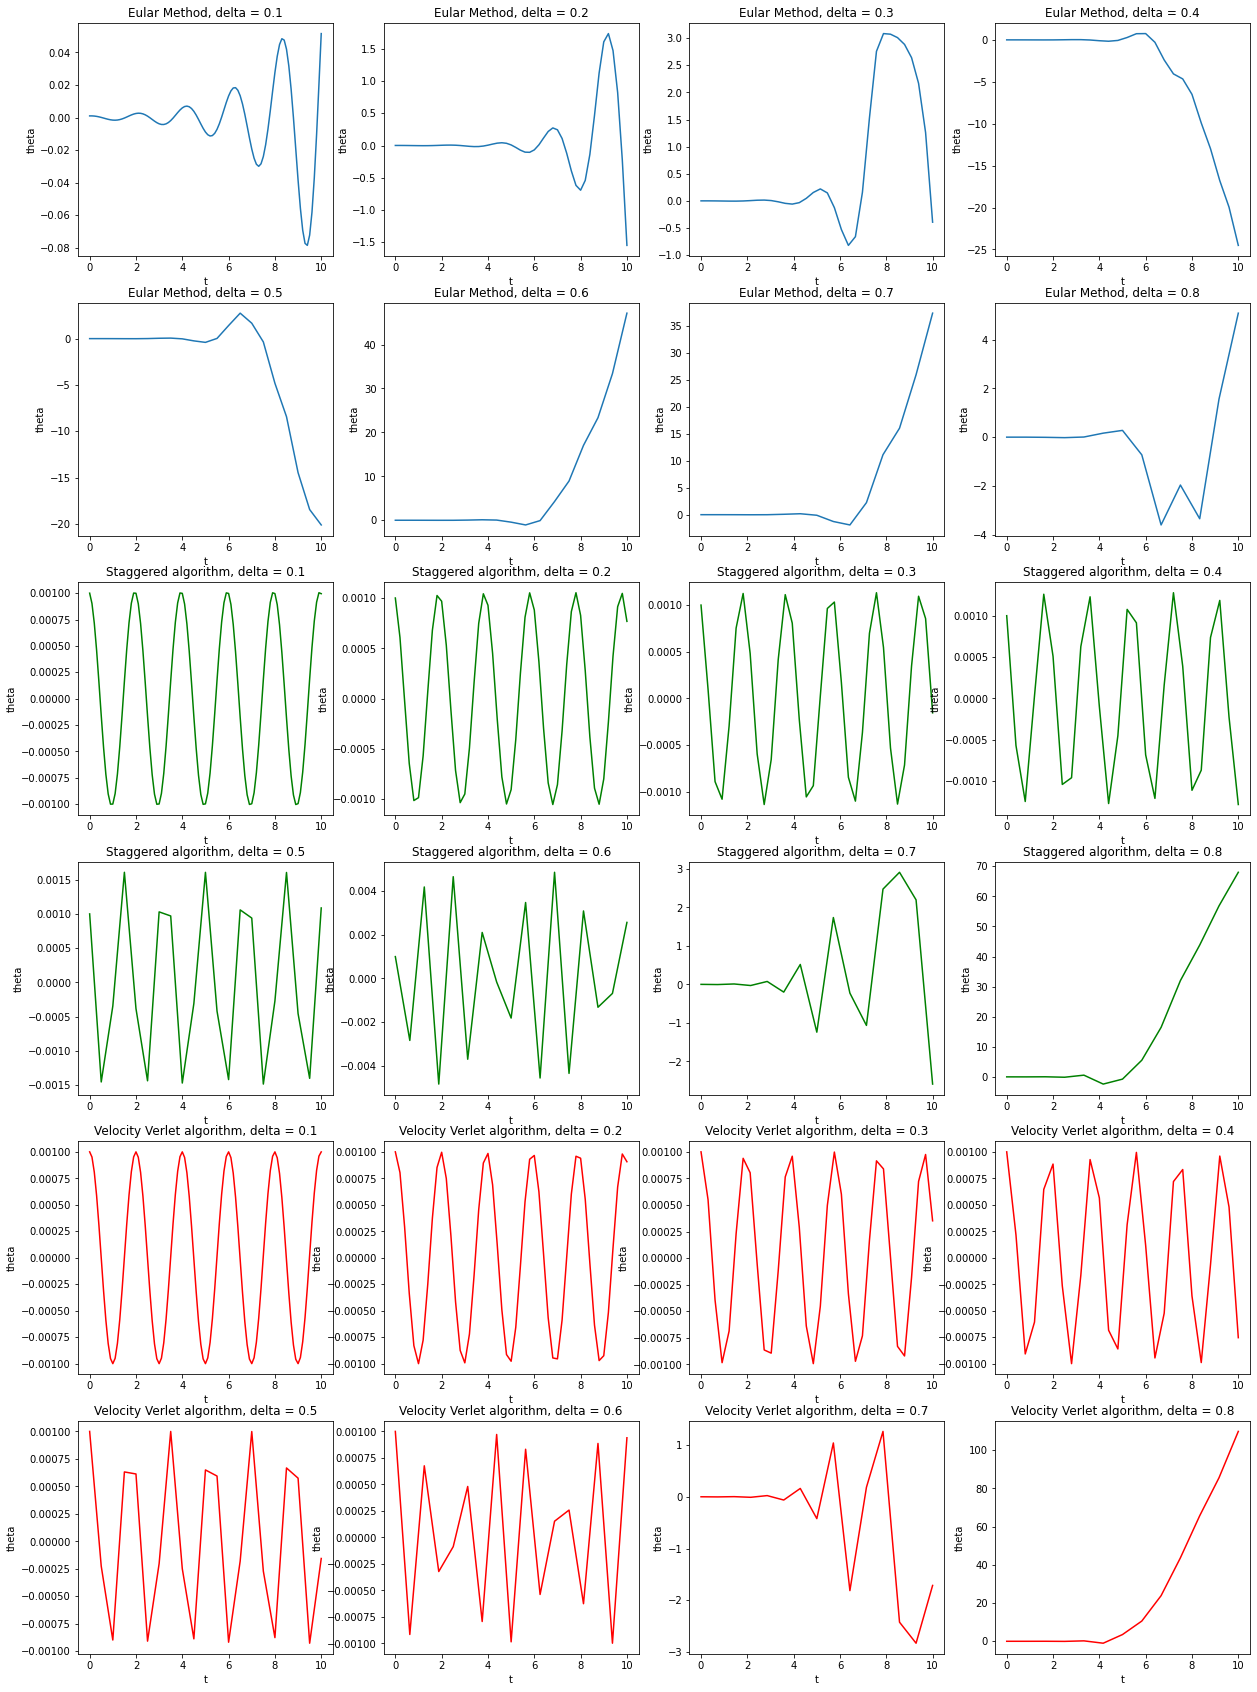

In [13]:
"""
Physical quantities
"""

g = 9.80655
l = 1
w = np.sqrt(g/l)
t = []
theta_M1 = []
theta_M2 = []
theta_M3 = []
for i in range(8):
    t.append(np.linspace(0,10,int(10/0.1/(i+1))+1))
    theta_M1.append([0.001])
    theta_M2.append([0.001])
    theta_M3.append([0.001])
    
'''
Simulation
'''
for j in range(len(t)):
    dtheta = [0,0,0]
    for i in range(len(t[j]) - 1):
        theta_M1_f,dtheta[0] = M1(theta_M1[j][i],dtheta[0],F(theta_M1[j][i],w),t[j][1]-t[j][0])
        theta_M1[j].append(theta_M1_f)
        theta_M2_f,dtheta[1] = M2(theta_M2[j][i],dtheta[1],F(theta_M2[j][i],w),t[j][1]-t[j][0])
        theta_M2[j].append(theta_M2_f)
        theta_M3_f,dtheta[2] = M3(theta_M3[j][i],dtheta[2],F(theta_M3[j][i],w),w,t[j][1]-t[j][0])
        theta_M3[j].append(theta_M3_f)

'''
Figure
'''

fig, ax = plt.subplots(nrows = 6, ncols = 4, figsize = (21,30));
ax = ax.flatten()
for i in range(8):
    ax[i].plot(t[i],theta_M1[i]);
    ax[i+8].plot(t[i],theta_M2[i],'g');
    ax[i+16].plot(t[i],theta_M3[i],'r');
    ax[i].set_xlabel("t");
    ax[i+8].set_xlabel("t");
    ax[i+16].set_xlabel("t");
    ax[i].set_ylabel("theta");
    ax[i+8].set_ylabel("theta");
    ax[i+16].set_ylabel("theta");
    d = 0.1*(i+1)
    ax[i].set_title("Eular Method, delta = %.1f" %d);
    ax[i+8].set_title("Staggered algorithm, delta = %.1f" %d);
    ax[i+16].set_title("Velocity Verlet algorithm, delta = %.1f" %d);

From the above figures, we could observe that $\delta_c = 0.2$ for Eular method, $\delta_c = 0.6$ for Staggered algorithm, and $\delta_c = 0.6$ for velocity Verlet algorithm. $\delta_c$ of Eular method is about $1/10$ of the characteristic time period of the pendulum, $\delta_c$ of Staggered algorithm and velocity Verlet algorithm is about $3/10$ of the characteristic time period of the pendulum.

## Task 4: Period

* For each of the method, determine the period of the oscillation and compare to the exact result for time steps $\delta=0.1, 0.01, 0.001$.

In [14]:
"""
Physical quantities
"""

g = 9.80655
l = 1
w = np.sqrt(g/l)
t = []
theta_M1 = []
theta_M2 = []
theta_M3 = []
t.append(np.linspace(0,3,31))
t.append(np.linspace(0,3,301))
t.append(np.linspace(0,3,3001))
for i in range(1,4):
    theta_M1.append([0.001])
    theta_M2.append([0.001])
    theta_M3.append([0.001])
    
'''
Simulation
'''

for j in range(len(t)):
    dtheta = [0,0,0]
    for i in range(len(t[j]-1)):
        theta_M1_f,dtheta[0] = M1(theta_M1[j][i],dtheta[0],F(theta_M1[j][i],w),t[j][1]-t[j][0])
        theta_M1[j].append(theta_M1_f)
        theta_M2_f,dtheta[1] = M2(theta_M2[j][i],dtheta[1],F(theta_M2[j][i],w),t[j][1]-t[j][0])
        theta_M2[j].append(theta_M2_f)
        theta_M3_f,dtheta[2] = M3(theta_M3[j][i],dtheta[2],F(theta_M3[j][i],w),w,t[j][1]-t[j][0])
        theta_M3[j].append(theta_M3_f)

'''
Text
'''
period_M1 = []
period_M2 = []
period_M3 = []
for j in range(len(t)):
    for i in range(2,len(t[j]) - 2):
        if theta_M1[j][i] >= theta_M1[j][i-1] and theta_M1[j][i] >= theta_M1[j][i+1]:
            period_M1.append(i/(len(t[j])-1)*3)
            print('period of Euler method = %.3f as delta = %.3f.' %(period_M1[j],t[j][1]-t[j][0]))
        if theta_M2[j][i] >= theta_M2[j][i-1] and theta_M2[j][i] >= theta_M2[j][i+1]:
            period_M2.append(i/(len(t[j])-1)*3)
            print('period of Staggered Algorithm = %.3f as delta = %.3f.' %(period_M2[j],t[j][1]-t[j][0]))
        if theta_M3[j][i] >= theta_M3[j][i-1] and theta_M3[j][i] >= theta_M3[j][i+1]:
            period_M3.append(i/(len(t[j])-1)*3)
            print('period of Velocity Verlet Algorithm = %.3f as delta = %.3f.' %(period_M3[j],t[j][1]-t[j][0]))


period of Staggered Algorithm = 1.900 as delta = 0.100.
period of Velocity Verlet Algorithm = 2.000 as delta = 0.100.
period of Euler method = 2.100 as delta = 0.100.
period of Staggered Algorithm = 2.000 as delta = 0.010.
period of Euler method = 2.010 as delta = 0.010.
period of Velocity Verlet Algorithm = 2.010 as delta = 0.010.
period of Staggered Algorithm = 2.006 as delta = 0.001.
period of Velocity Verlet Algorithm = 2.006 as delta = 0.001.
period of Euler method = 2.007 as delta = 0.001.
